# Exploratory Data Analysis (EDA)

We have seen some early examples of EDA in the pre-work/Bootcamp. This session will expand on this with more examples - again using the Boston house price data from the last example. As such, we start by importing the data:

In [1]:
# !pip install scikit-learn or !pip install --user scikit-learn

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

# Only works on Jupyter/Anaconda
%matplotlib inline 

# import a standard dataset - the Boston house price index
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# convert to data frame using Pandas
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We will also add the $ Y $ value from the previous analysis to the DataFrame so we can include it in our EDA:

In [2]:
# add the target value (Median Value)
boston['MV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We can get informtaion about the data using the _info_ function:

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MV       506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


We can see from this all our data items are of the type _float64_ (64-bit real numbers - with decimals). We can also see that each has "506 non-null" records and there are "506 entries". Seemingly there is no missing data but we can of course verify that with code we used in our previous _pandas'_ Notebooks: 

In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MV         0
dtype: int64

No missing data! If we had found some there are various options including deleting the rows (see the previous Notebook) effected or even deleting the columns. If we want to check if its sensible to delete a column we may want to see the percentage of the column's data that is missing:

In [5]:
# Percent of data which is not available
boston.isnull().sum()/len(boston) * 100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MV         0.0
dtype: float64

_pandas_ will also give us summary statistics about this data:

In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see there is some variation in the data format with some on a scale between 0 and 1 while "TAX" has a maximum value of 711. We will want to even this out and will cover that in the next Notebook.

## Visualising the Data

[]

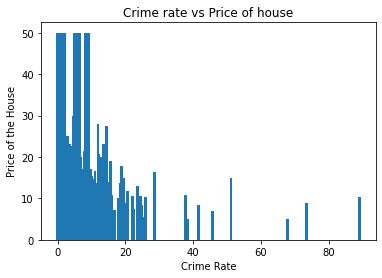

In [7]:
plt.bar(boston.CRIM, boston.MV)
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.title('Crime rate vs Price of house')
plt.plot()

As we might predict, as crime rate decreases house prices increase. Let's look at another:

[]

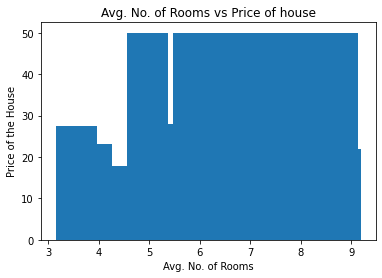

In [8]:
plt.bar(boston.RM, boston.MV)
plt.xlabel('Avg. No. of Rooms')
plt.ylabel('Price of the House')
plt.title('Avg. No. of Rooms vs Price of house')
plt.plot()

Again, unsurprisingly, more rooms suggests higher prices although after a certain point the relationship flattens. We would probably want to look at this for all our data, but for now we can move on.

Given we are doing a linear regression, it would make sense to check the data for normality. Let's start with a histogram:

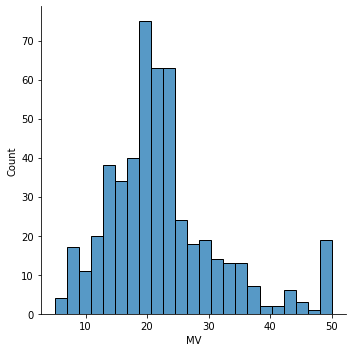

In [9]:
ax = sns.displot(boston.MV)

Whilst this is not exactly normal - slightly skewed and with a lot of values in the very last bin - its probably fine in practice. However, let's back this up with some actual testing:

In [10]:
# Use the Kolmogorov-Smirnov test
from scipy.stats import kstest

for col in boston.columns: # iteratre over each column
     # compare the column distribution to a normal distribution
    statistic, pval = kstest(boston[col], "norm")
    print(f"column = {col}") 
    print(f"p value = {pval}")
    if pval < 0.05:
        print("Probably not normal")
    else:
        print("Probaly normal")
    print("\n")

column = CRIM
p value = 9.101764614072096e-119
Probably not normal


column = ZN
p value = 1.6871111181943794e-117
Probably not normal


column = INDUS
p value = 0.0
Probably not normal


column = CHAS
p value = 1.6871111181943794e-117
Probably not normal


column = NOX
p value = 2.7133228490861893e-209
Probably not normal


column = RM
p value = 0.0
Probably not normal


column = AGE
p value = 0.0
Probably not normal


column = DIS
p value = 0.0
Probably not normal


column = RAD
p value = 0.0
Probably not normal


column = TAX
p value = 0.0
Probably not normal


column = PTRATIO
p value = 0.0
Probably not normal


column = B
p value = 0.0
Probably not normal


column = LSTAT
p value = 0.0
Probably not normal


column = MV
p value = 0.0
Probably not normal




In each case we are rejecting the null hypothesis ($ H_{0} $ _= each of the columns has the same distribution as a normal distribution)_ ... so maybe Linear Regression is not the best appraoch!

As well as making an assumption that our data is normally distributed, Linear Regression also assumes that our features ($ X $'s) are not corrleated with each other (multicolinearity - read more [here](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/multicollinearity.html)). We can test for this with a correlation matrix:

<AxesSubplot:>

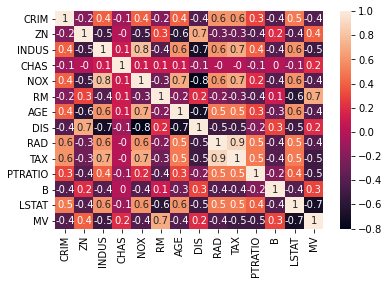

In [11]:
# create a correlation matrix rounding to one decimal point
correlation_matrix = boston.corr().round(1)
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

This chart can tell us a few interesting things. 

One is the features that have the strongest influence on (i.e. are most predictive of) our target variable ("MV"). We measure this on a scale between -1 and 1 ... where -1 means perfective negative correlation (every unit that $ X $ is reduced by then $ Y $ would increase by a unit and vice versa); 1  means perfect positive correlation (every unit that $ X $ increase by, $ Y $ increase by a unit); 0 means no correlation at all.

We can see that "MV" has perfect correlation with itself (all variables do obviously and this is then diagonal down the middle). We can also see it has a strong negative correlation with "LSTAT" at -0.7 and strong positive correlations with "RM" at 0.7.

We also use it to see if any of our features ($ X $'s) have high positive or negative correlation. There are a few we might be concerned about but the most so is "RAD" and "TAX" at 0.9. We should probably drop one but which? We could take a data driven approach and compare their correlation with "MV". In this case "RAD" is -0.4 and "TAX" -0.5 - so "TAX" has the stronger effect and "RAD" should be dropped. We may also consider what the data means (theory driven). To save you going back to the description in the previous Notebook, "RAD" is defined as "\[the\] index of accessibility to radial highways" and "TAX" as "full-value property-tax rate per \\$10,000". So one relates to closeness to key roads and the other relates to property tax ... I would assume "TAX" to be more relevant in our task. Either way we arrive at the same conclusion and should drop "RAD". (We'll also drop the target value ($ Y $) now so that we are ready to split our data: 

In [12]:
boston = boston.drop(['RAD', 'MV'], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33


And that's it! There are of course many of things we _could_ do but this is a fairly typical example of an EDA process. Well done :)